# Перцептрон
## Цель работы
Познакомиться с перцептроном как с моделью обучения с учителем в библиотеке sklearn.

## Содержание работы
1. Сгенерируйте данные и обучите на них модель перцептрона.
2. Просмотрите параметры модели, визуализируйте и улучшите ее работу.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Сгенерируйте данные и обучите на них модель перцептрона.

In [5]:
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier

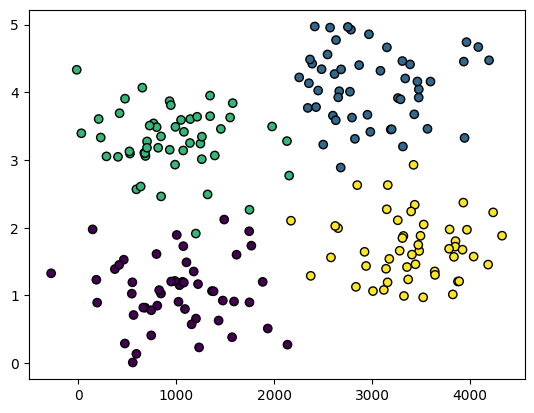

In [4]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [6]:
clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X, y)

### 2. Просмотрите параметры модели, визуализируйте и улучшите ее работу.

In [10]:
from sklearn.metrics import confusion_matrix

In [7]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [8]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.09809877 -0.58903611], 
0 1 [ 0.33667051 -0.31219238], 
0 2 [-0.82024119 -0.22424296], 
0 3 [-0.29720839  0.11423652], 
0 4 [-0.56852789 -0.18324369], 
0 5 [-0.66056109  0.37321781], 

1 0 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
1 1 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
1 2 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
1 3 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [9]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


In [11]:
confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]], dtype=int64)

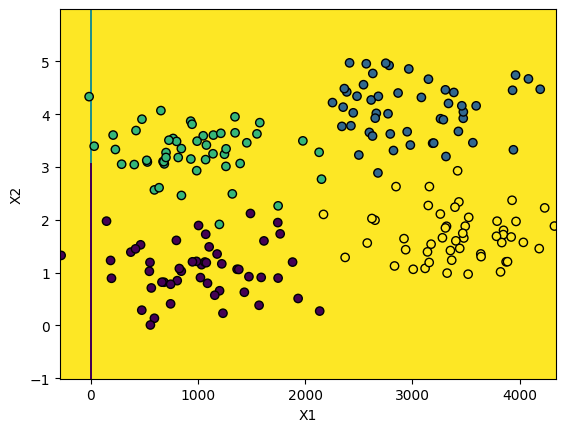

In [12]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Нормализуем данные в стандартные значения

In [13]:
from sklearn.preprocessing import StandardScaler 

In [16]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [17]:
X_scaled = scaler.transform(X)

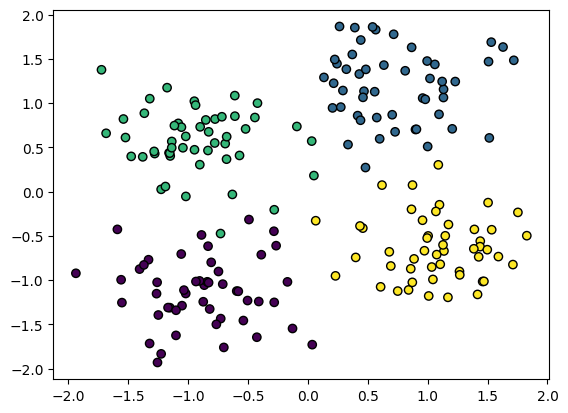

In [18]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)

In [19]:
clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X_scaled, y)

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
confusion_matrix(y, clf.predict(X_scaled))

array([[22,  0, 11, 17],
       [ 0, 38,  0, 12],
       [ 0,  3, 45,  2],
       [ 0,  5,  0, 45]], dtype=int64)

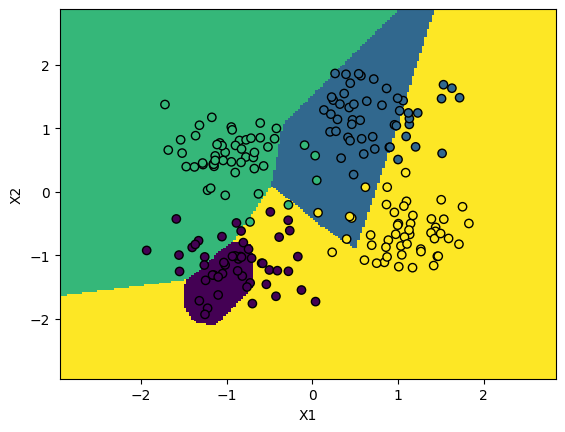

In [22]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [23]:
clf = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.83775023
Iteration 2, loss = 1.83270889
Iteration 3, loss = 1.82768787
Iteration 4, loss = 1.82268887
Iteration 5, loss = 1.81770319
Iteration 6, loss = 1.81273623
Iteration 7, loss = 1.80778852
Iteration 8, loss = 1.80286035
Iteration 9, loss = 1.79795197
Iteration 10, loss = 1.79306363
Iteration 11, loss = 1.78819556
Iteration 12, loss = 1.78334797
Iteration 13, loss = 1.77852106
Iteration 14, loss = 1.77371502
Iteration 15, loss = 1.76892404
Iteration 16, loss = 1.76415326
Iteration 17, loss = 1.75940349
Iteration 18, loss = 1.75467492
Iteration 19, loss = 1.74996161
Iteration 20, loss = 1.74526098
Iteration 21, loss = 1.74058120
Iteration 22, loss = 1.73592075
Iteration 23, loss = 1.73127532
Iteration 24, loss = 1.72664219
Iteration 25, loss = 1.72202696
Iteration 26, loss = 1.71742826
Iteration 27, loss = 1.71284219
Iteration 28, loss = 1.70827464
Iteration 29, loss = 1.70372203
Iteration 30, loss = 1.69918892
Iteration 31, loss = 1.69467632
Iteration 32, los

In [24]:
confusion_matrix(y, clf.predict(X_scaled))

array([[49,  0,  1,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]], dtype=int64)

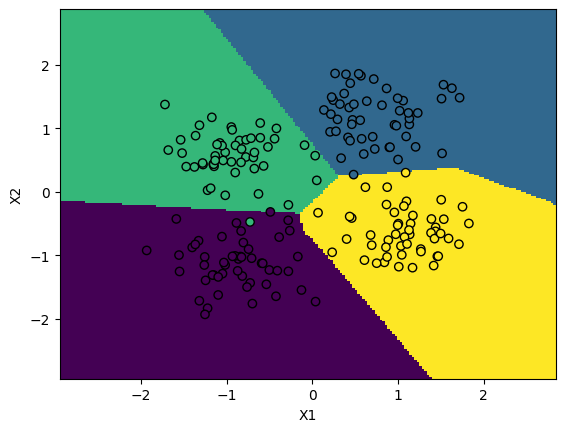

In [25]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [52]:
clf = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=10_000).fit(X_scaled, y)

In [53]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]], dtype=int64)

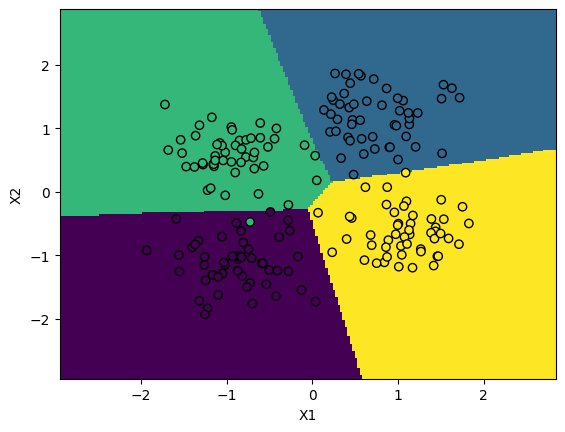

In [54]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Задания для самостоятельного выполнения

### 1. Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.

#### Перцептрон с 1им нейроном

In [55]:
clf = MLPClassifier(hidden_layer_sizes=(1,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.57894471
Iteration 2, loss = 1.57826893
Iteration 3, loss = 1.57759576
Iteration 4, loss = 1.57692524
Iteration 5, loss = 1.57625742
Iteration 6, loss = 1.57559233
Iteration 7, loss = 1.57493050
Iteration 8, loss = 1.57427181
Iteration 9, loss = 1.57361595
Iteration 10, loss = 1.57296318
Iteration 11, loss = 1.57231387
Iteration 12, loss = 1.57166744
Iteration 13, loss = 1.57102448
Iteration 14, loss = 1.57038587
Iteration 15, loss = 1.56975014
Iteration 16, loss = 1.56911726
Iteration 17, loss = 1.56848723
Iteration 18, loss = 1.56786004
Iteration 19, loss = 1.56723567
Iteration 20, loss = 1.56661412
Iteration 21, loss = 1.56599538
Iteration 22, loss = 1.56537945
Iteration 23, loss = 1.56476632
Iteration 24, loss = 1.56415598
Iteration 25, loss = 1.56354841
Iteration 26, loss = 1.56294362
Iteration 27, loss = 1.56234161
Iteration 28, loss = 1.56174277
Iteration 29, loss = 1.56114664
Iteration 30, loss = 1.56055321
Iteration 31, loss = 1.55996246
Iteration 32, los

In [56]:
confusion_matrix(y, clf.predict(X_scaled))

array([[ 0,  0, 50,  0],
       [ 0,  3,  0, 47],
       [ 0,  0, 50,  0],
       [ 0,  1,  1, 48]], dtype=int64)

In [58]:
clf.score(X_scaled, y)

0.505

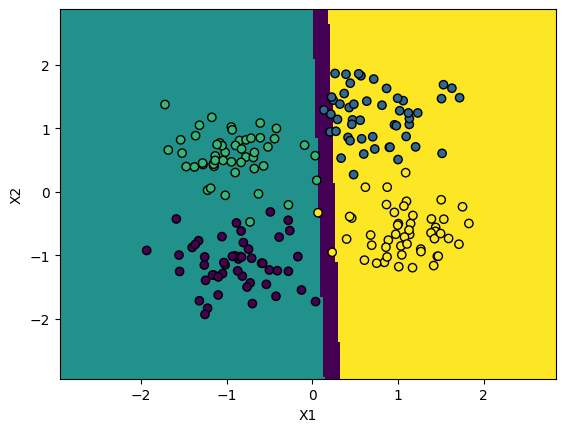

In [57]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### Перцептрон с 2мя нейронами

In [59]:
clf = MLPClassifier(hidden_layer_sizes=(2,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.85872869
Iteration 2, loss = 1.85670396
Iteration 3, loss = 1.85468589
Iteration 4, loss = 1.85267376
Iteration 5, loss = 1.85066680
Iteration 6, loss = 1.84866508
Iteration 7, loss = 1.84666868
Iteration 8, loss = 1.84467766
Iteration 9, loss = 1.84269210
Iteration 10, loss = 1.84071207
Iteration 11, loss = 1.83873765
Iteration 12, loss = 1.83676891
Iteration 13, loss = 1.83480592
Iteration 14, loss = 1.83284873
Iteration 15, loss = 1.83089743
Iteration 16, loss = 1.82895205
Iteration 17, loss = 1.82701267
Iteration 18, loss = 1.82507933
Iteration 19, loss = 1.82315209
Iteration 20, loss = 1.82123100
Iteration 21, loss = 1.81931609
Iteration 22, loss = 1.81740742
Iteration 23, loss = 1.81550560
Iteration 24, loss = 1.81361148
Iteration 25, loss = 1.81172374
Iteration 26, loss = 1.80984239
Iteration 27, loss = 1.80796745
Iteration 28, loss = 1.80609893
Iteration 29, loss = 1.80423683
Iteration 30, loss = 1.80238118
Iteration 31, loss = 1.80053198
Iteration 32, los

In [60]:
confusion_matrix(y, clf.predict(X_scaled))

array([[49,  0,  1,  0],
       [ 0, 50,  0,  0],
       [ 1,  1, 48,  0],
       [ 1, 49,  0,  0]], dtype=int64)

In [61]:
clf.score(X_scaled, y)

0.735

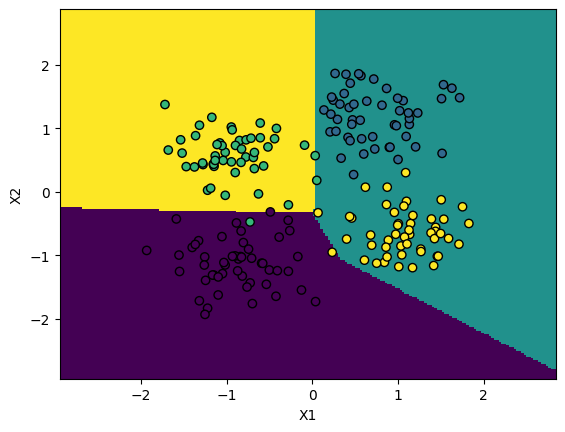

In [62]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### Перцептрон со 100 нейронами

In [63]:
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.40238066
Iteration 2, loss = 1.38615455
Iteration 3, loss = 1.37008175
Iteration 4, loss = 1.35415589
Iteration 5, loss = 1.33836997
Iteration 6, loss = 1.32273921
Iteration 7, loss = 1.30726733
Iteration 8, loss = 1.29194733
Iteration 9, loss = 1.27678688
Iteration 10, loss = 1.26177438
Iteration 11, loss = 1.24691678
Iteration 12, loss = 1.23220433
Iteration 13, loss = 1.21762333
Iteration 14, loss = 1.20318733
Iteration 15, loss = 1.18889039
Iteration 16, loss = 1.17472799
Iteration 17, loss = 1.16069160
Iteration 18, loss = 1.14678436
Iteration 19, loss = 1.13301091
Iteration 20, loss = 1.11937840
Iteration 21, loss = 1.10587386
Iteration 22, loss = 1.09247995
Iteration 23, loss = 1.07920742
Iteration 24, loss = 1.06605688
Iteration 25, loss = 1.05303119
Iteration 26, loss = 1.04013309
Iteration 27, loss = 1.02735561
Iteration 28, loss = 1.01469423
Iteration 29, loss = 1.00213978
Iteration 30, loss = 0.98970394
Iteration 31, loss = 0.97738042
Iteration 32, los

In [64]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]], dtype=int64)

In [65]:
clf.score(X_scaled, y)

0.995

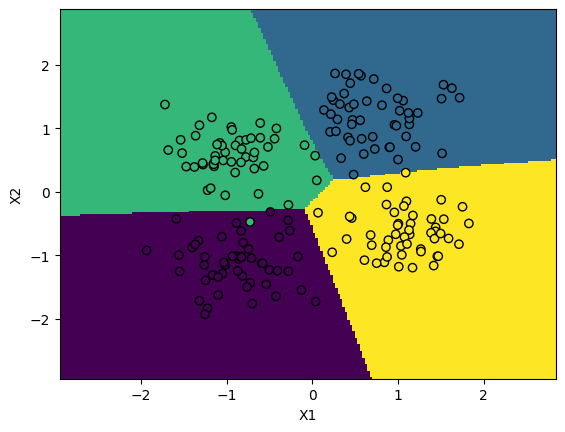

In [66]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 2. Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.

#### 2 СКРЫТЫХ СЛОЯ

In [71]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.63225031
Iteration 2, loss = 1.62567092
Iteration 3, loss = 1.61915489
Iteration 4, loss = 1.61271453
Iteration 5, loss = 1.60633308
Iteration 6, loss = 1.60000800
Iteration 7, loss = 1.59375106
Iteration 8, loss = 1.58755746
Iteration 9, loss = 1.58141563
Iteration 10, loss = 1.57532935
Iteration 11, loss = 1.56929811
Iteration 12, loss = 1.56333422
Iteration 13, loss = 1.55744820
Iteration 14, loss = 1.55162131
Iteration 15, loss = 1.54586793
Iteration 16, loss = 1.54017523
Iteration 17, loss = 1.53454674
Iteration 18, loss = 1.52897671
Iteration 19, loss = 1.52345235
Iteration 20, loss = 1.51797409
Iteration 21, loss = 1.51254727
Iteration 22, loss = 1.50716068
Iteration 23, loss = 1.50181230
Iteration 24, loss = 1.49650874
Iteration 25, loss = 1.49124760
Iteration 26, loss = 1.48602426
Iteration 27, loss = 1.48084690
Iteration 28, loss = 1.47572121
Iteration 29, loss = 1.47064946
Iteration 30, loss = 1.46561861
Iteration 31, loss = 1.46060838
Iteration 32, los

In [72]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 2,  2, 46,  0],
       [ 0,  1,  0, 49]], dtype=int64)

In [73]:
clf.score(X_scaled, y)

0.975

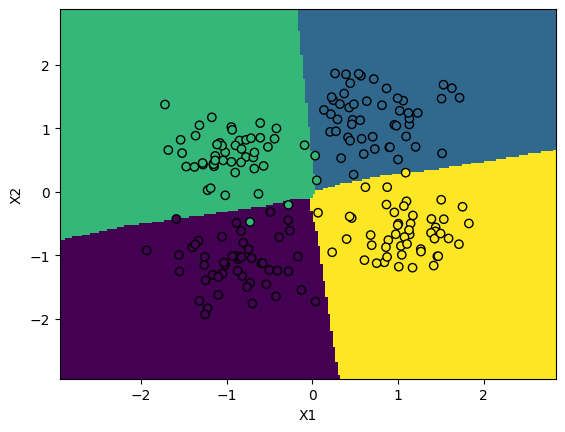

In [74]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### 3 СКРЫТЫХ СЛОЯ

In [75]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.54288676
Iteration 2, loss = 1.53679654
Iteration 3, loss = 1.53072388
Iteration 4, loss = 1.52472789
Iteration 5, loss = 1.51877205
Iteration 6, loss = 1.51284771
Iteration 7, loss = 1.50693503
Iteration 8, loss = 1.50104027
Iteration 9, loss = 1.49517965
Iteration 10, loss = 1.48934310
Iteration 11, loss = 1.48349980
Iteration 12, loss = 1.47761950
Iteration 13, loss = 1.47174785
Iteration 14, loss = 1.46590520
Iteration 15, loss = 1.46009350
Iteration 16, loss = 1.45432093
Iteration 17, loss = 1.44857088
Iteration 18, loss = 1.44285266
Iteration 19, loss = 1.43713282
Iteration 20, loss = 1.43142945
Iteration 21, loss = 1.42573999
Iteration 22, loss = 1.42004833
Iteration 23, loss = 1.41435235
Iteration 24, loss = 1.40865514
Iteration 25, loss = 1.40296243
Iteration 26, loss = 1.39724548
Iteration 27, loss = 1.39148986
Iteration 28, loss = 1.38568972
Iteration 29, loss = 1.37989265
Iteration 30, loss = 1.37401333
Iteration 31, loss = 1.36806585
Iteration 32, los

In [76]:
confusion_matrix(y, clf.predict(X_scaled))

array([[49,  0,  1,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]], dtype=int64)

In [77]:
clf.score(X_scaled, y)

0.99

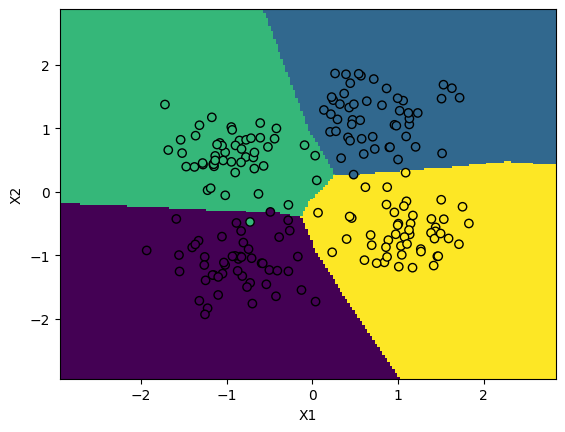

In [78]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### 10 СКРЫТЫХ СЛОЯ

In [79]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.43096829
Iteration 2, loss = 1.42656990
Iteration 3, loss = 1.42238013
Iteration 4, loss = 1.41838263
Iteration 5, loss = 1.41455268
Iteration 6, loss = 1.41089674
Iteration 7, loss = 1.40742328
Iteration 8, loss = 1.40410479
Iteration 9, loss = 1.40093237
Iteration 10, loss = 1.39788604
Iteration 11, loss = 1.39494933
Iteration 12, loss = 1.39210794
Iteration 13, loss = 1.38933575
Iteration 14, loss = 1.38659272
Iteration 15, loss = 1.38381936
Iteration 16, loss = 1.38090474
Iteration 17, loss = 1.37781465
Iteration 18, loss = 1.37445903
Iteration 19, loss = 1.37095904
Iteration 20, loss = 1.36743223
Iteration 21, loss = 1.36390056
Iteration 22, loss = 1.36045142
Iteration 23, loss = 1.35709016
Iteration 24, loss = 1.35390853
Iteration 25, loss = 1.35082402
Iteration 26, loss = 1.34774601
Iteration 27, loss = 1.34468798
Iteration 28, loss = 1.34161269
Iteration 29, loss = 1.33844021
Iteration 30, loss = 1.33520581
Iteration 31, loss = 1.33201440
Iteration 32, los

In [80]:
confusion_matrix(y, clf.predict(X_scaled))

array([[49,  0,  1,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]], dtype=int64)

In [81]:
clf.score(X_scaled, y)

0.99

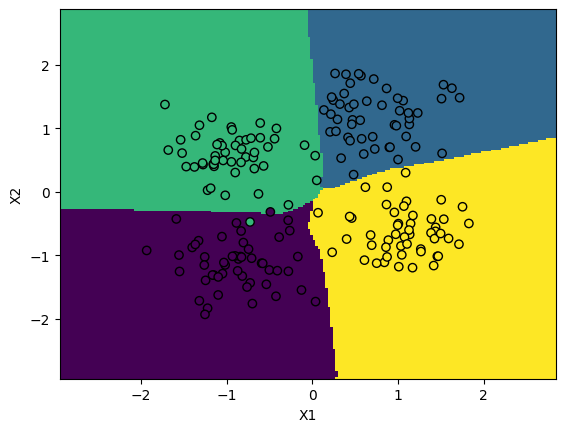

In [82]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### 3. Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.

In [84]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.48090641
Iteration 2, loss = 1.47151356
Iteration 3, loss = 1.46230710
Iteration 4, loss = 1.45330031
Iteration 5, loss = 1.44450156
Iteration 6, loss = 1.43590821
Iteration 7, loss = 1.42751773
Iteration 8, loss = 1.41934353
Iteration 9, loss = 1.41136719
Iteration 10, loss = 1.40356883
Iteration 11, loss = 1.39596813
Iteration 12, loss = 1.38849506
Iteration 13, loss = 1.38114186
Iteration 14, loss = 1.37394502
Iteration 15, loss = 1.36693043
Iteration 16, loss = 1.36008762
Iteration 17, loss = 1.35344730
Iteration 18, loss = 1.34700625
Iteration 19, loss = 1.34070288
Iteration 20, loss = 1.33456785
Iteration 21, loss = 1.32851348
Iteration 22, loss = 1.32252119
Iteration 23, loss = 1.31658983
Iteration 24, loss = 1.31071446
Iteration 25, loss = 1.30486520
Iteration 26, loss = 1.29905067
Iteration 27, loss = 1.29327699
Iteration 28, loss = 1.28752531
Iteration 29, loss = 1.28179310
Iteration 30, loss = 1.27610111
Iteration 31, loss = 1.27043551
Iteration 32, los

In [87]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.75612068  0.93249792], 
0 1 [ 0.52051891 -0.01052908], 
0 2 [ 0.54084775 -0.96112799], 
0 3 [-0.68055663 -0.62217626], 
0 4 [-0.99329494 -0.71730383], 
0 5 [ 0.29629347 -0.2178318 ], 
0 6 [0.21400703 0.23244003], 
0 7 [1.02864688 0.98720321], 
0 8 [-0.18368751 -0.26320197], 
0 9 [ 0.30485049 -0.89402749], 

1 0 [-0.42918856  0.26927643  0.72840958  0.37518839  0.72951492 -0.3120041
  0.01364168 -0.31626963 -0.10775023  0.84271369], 
1 1 [ 2.22976782e-01 -3.13573384e-01 -1.74050548e-01  9.35181878e-02
  2.32939623e-01 -3.18514830e-05  3.88234128e-01 -6.89525774e-02
 -5.49094837e-01 -7.24960594e-01], 
1 2 [-0.33508299  0.67258401  0.11955332 -0.62788425 -0.75834125 -0.14687394
 -0.31126339  0.6010679   0.18663907  0.38174399], 
1 3 [ 0.46492921  0.11400672  0.26222575  0.73785981  0.64456878 -0.03814143
  0.19428853 -0.25034873 -0.37565314  0.27515897], 
1 4 [ 0.64754113 -0.07678147  0.20703277  0.03884925 -0.04062184 -0.09279796
  0.01538659 -0.52831929 -0.54862562 -0.37096173],

In [91]:
for i in range(len(clf.intercepts_)):
    print(clf.intercepts_[i])

[ 0.65241933  1.02176474  0.828859   -0.14119108  0.71821368 -0.7206122
 -0.56634737  0.15764898 -0.50933178  0.47343287]
[-0.19345122 -0.33434063  0.28784223  0.56890015  0.27589785 -0.19740112
 -0.2155063  -0.23221606 -0.01654347  0.07262117]
[-0.34979317  0.57063357 -0.49615973  0.40282509  0.03877004  0.25977814
  0.35419175  0.62811406  0.49104198 -0.4360707 ]
[ 0.41323657 -0.61843004  0.34267793  0.48485718]


### 4. Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.

In [92]:
import time

In [95]:
start = time.time()
clf = MLPClassifier(hidden_layer_sizes=(10, ), max_iter=10_000, verbose=True).fit(X_scaled, y)
end = time.time()
print("Time: ", end - start)

Iteration 1, loss = 2.11943758
Iteration 2, loss = 2.11079873
Iteration 3, loss = 2.10220634
Iteration 4, loss = 2.09366118
Iteration 5, loss = 2.08515368
Iteration 6, loss = 2.07668200
Iteration 7, loss = 2.06824564
Iteration 8, loss = 2.05984343
Iteration 9, loss = 2.05147761
Iteration 10, loss = 2.04314335
Iteration 11, loss = 2.03483848
Iteration 12, loss = 2.02656759
Iteration 13, loss = 2.01835061
Iteration 14, loss = 2.01017052
Iteration 15, loss = 2.00203338
Iteration 16, loss = 1.99393009
Iteration 17, loss = 1.98585634
Iteration 18, loss = 1.97781693
Iteration 19, loss = 1.96981673
Iteration 20, loss = 1.96184913
Iteration 21, loss = 1.95391139
Iteration 22, loss = 1.94599966
Iteration 23, loss = 1.93812036
Iteration 24, loss = 1.93027335
Iteration 25, loss = 1.92246211
Iteration 26, loss = 1.91468029
Iteration 27, loss = 1.90693720
Iteration 28, loss = 1.89923074
Iteration 29, loss = 1.89156221
Iteration 30, loss = 1.88393227
Iteration 31, loss = 1.87632974
Iteration 32, los

In [94]:
start = time.time()
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100), max_iter=10_000, verbose=True).fit(X_scaled, y)
end = time.time()
print("Time: ", end - start)

Iteration 1, loss = 1.40375561
Iteration 2, loss = 1.38703875
Iteration 3, loss = 1.37523083
Iteration 4, loss = 1.36404483
Iteration 5, loss = 1.35089816
Iteration 6, loss = 1.33504761
Iteration 7, loss = 1.31518069
Iteration 8, loss = 1.29237459
Iteration 9, loss = 1.26680592
Iteration 10, loss = 1.23806948
Iteration 11, loss = 1.20492127
Iteration 12, loss = 1.16666191
Iteration 13, loss = 1.12414437
Iteration 14, loss = 1.07543541
Iteration 15, loss = 1.01845269
Iteration 16, loss = 0.95267129
Iteration 17, loss = 0.87900235
Iteration 18, loss = 0.80055383
Iteration 19, loss = 0.71772599
Iteration 20, loss = 0.63206327
Iteration 21, loss = 0.54828012
Iteration 22, loss = 0.46993854
Iteration 23, loss = 0.39677128
Iteration 24, loss = 0.32865975
Iteration 25, loss = 0.26508319
Iteration 26, loss = 0.20652339
Iteration 27, loss = 0.15553312
Iteration 28, loss = 0.11440189
Iteration 29, loss = 0.08363552
Iteration 30, loss = 0.06185194
Iteration 31, loss = 0.04687238
Iteration 32, los

### 5. Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).

In [96]:
from sklearn.datasets import load_iris

In [97]:
X, y = load_iris(return_X_y=True)

In [98]:
X_scaled_iris = scaler.fit_transform(X)

In [107]:
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10_000, verbose=True).fit(X_scaled_iris, y)

Iteration 1, loss = 0.98283317
Iteration 2, loss = 0.97740008
Iteration 3, loss = 0.97202601
Iteration 4, loss = 0.96666606
Iteration 5, loss = 0.96132940
Iteration 6, loss = 0.95603461
Iteration 7, loss = 0.95080724
Iteration 8, loss = 0.94562373
Iteration 9, loss = 0.94046527
Iteration 10, loss = 0.93534415
Iteration 11, loss = 0.93021235
Iteration 12, loss = 0.92509702
Iteration 13, loss = 0.92002476
Iteration 14, loss = 0.91497070
Iteration 15, loss = 0.90992488
Iteration 16, loss = 0.90484791
Iteration 17, loss = 0.89977662
Iteration 18, loss = 0.89471028
Iteration 19, loss = 0.88965215
Iteration 20, loss = 0.88462933
Iteration 21, loss = 0.87960828
Iteration 22, loss = 0.87457587
Iteration 23, loss = 0.86954329
Iteration 24, loss = 0.86452830
Iteration 25, loss = 0.85950037
Iteration 26, loss = 0.85447358
Iteration 27, loss = 0.84945854
Iteration 28, loss = 0.84444763
Iteration 29, loss = 0.83937717
Iteration 30, loss = 0.83430746
Iteration 31, loss = 0.82925769
Iteration 32, los

In [111]:
confusion_matrix(y, clf.predict(X_scaled_iris))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]], dtype=int64)

### 6. Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.

In [135]:
from sklearn.datasets import load_diabetes

In [136]:
diabets = load_diabetes()

In [144]:
features = diabets.data

In [145]:
data = pd.DataFrame(features, columns = diabets.feature_names)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [160]:
X_diabetes, y_diabetes = diabets.data, diabets.target

In [161]:
X_diabetes.shape

(442, 10)

In [162]:
X_diabetes_scaled = scaler.fit_transform(X_diabetes)

In [176]:
clf = MLPClassifier(hidden_layer_sizes=(12, 12), max_iter=10_000, verbose=True).fit(X_diabetes_scaled, y_diabetes)

Iteration 1, loss = 5.38291419
Iteration 2, loss = 5.37552549
Iteration 3, loss = 5.36990774
Iteration 4, loss = 5.36466484
Iteration 5, loss = 5.35942832
Iteration 6, loss = 5.35452983
Iteration 7, loss = 5.34971890
Iteration 8, loss = 5.34498015
Iteration 9, loss = 5.34016847
Iteration 10, loss = 5.33543415
Iteration 11, loss = 5.33072735
Iteration 12, loss = 5.32570254
Iteration 13, loss = 5.32069450
Iteration 14, loss = 5.31541709
Iteration 15, loss = 5.30989397
Iteration 16, loss = 5.30418748
Iteration 17, loss = 5.29825408
Iteration 18, loss = 5.29197717
Iteration 19, loss = 5.28549099
Iteration 20, loss = 5.27877185
Iteration 21, loss = 5.27185040
Iteration 22, loss = 5.26458356
Iteration 23, loss = 5.25691864
Iteration 24, loss = 5.24901533
Iteration 25, loss = 5.24085799
Iteration 26, loss = 5.23204577
Iteration 27, loss = 5.22308227
Iteration 28, loss = 5.21351936
Iteration 29, loss = 5.20368296
Iteration 30, loss = 5.19338190
Iteration 31, loss = 5.18237974
Iteration 32, los

In [177]:
confusion_matrix(y_diabetes, clf.predict(X_diabetes_scaled))

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [178]:
clf.score(X_diabetes_scaled, y_diabetes)

0.8597285067873304